In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import logging
logging.getLogger('matplotlib.font_manager').disabled = True 
import random

seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value) 

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(test_labels)

10000

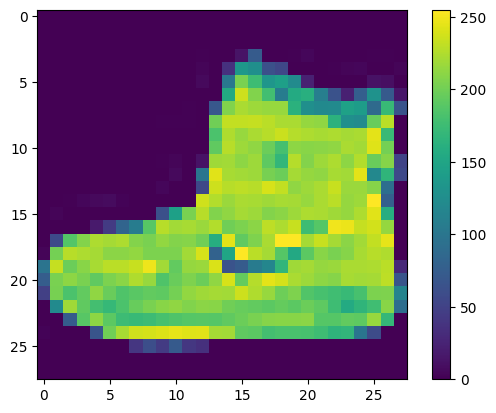

In [9]:
plt.figure() 
plt.imshow(train_images[0]) 
plt.colorbar() 
plt.grid(False)
plt.show() 

In [10]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255

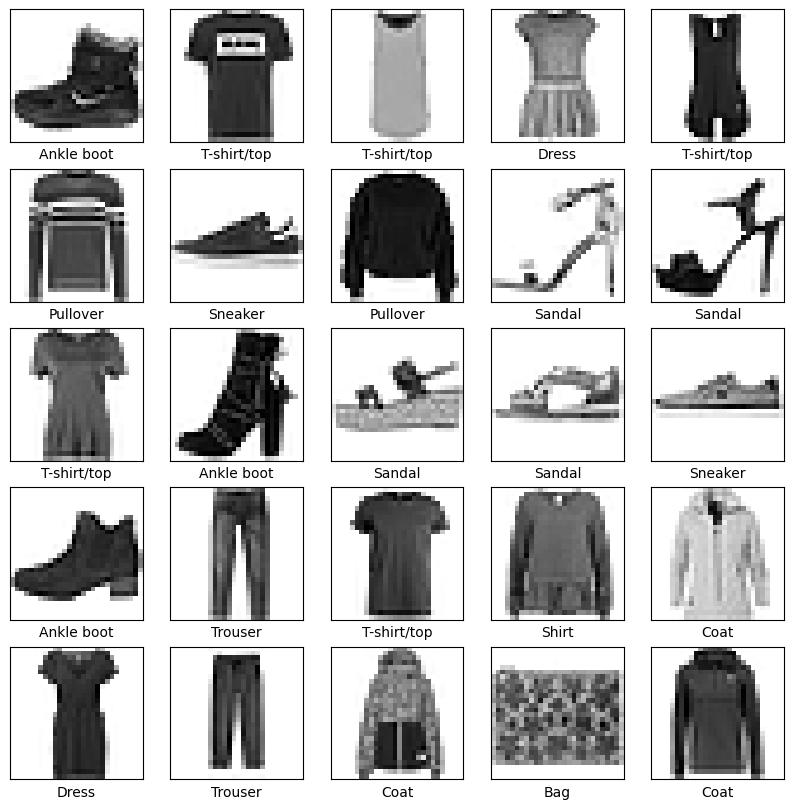

In [11]:
plt.figure(figsize=(10,10)) 
for i in range(25): 
    plt.subplot(5,5,i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[train_labels[i]]) 
plt.show()

In [12]:
model_tf = tf.keras.Sequential([ 
    tf.keras.layers.Input(shape=(28, 28)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='relu'),  
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [13]:
model_tf.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy']) 

In [14]:
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True 
)


history = model_tf.fit(
    train_images, train_labels,
    epochs=40,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]  
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7316 - loss: 0.7440 - val_accuracy: 0.8441 - val_loss: 0.4242
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8383 - loss: 0.4489 - val_accuracy: 0.8545 - val_loss: 0.3966
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8509 - loss: 0.4068 - val_accuracy: 0.8608 - val_loss: 0.3802
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8574 - loss: 0.3908 - val_accuracy: 0.8673 - val_loss: 0.3687
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8635 - loss: 0.3723 - val_accuracy: 0.8687 - val_loss: 0.3611
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8684 - loss: 0.3578 - val_accuracy: 0.8700 - val_loss: 0.3573
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8705 - loss: 0.3544 - val_accuracy: 0.8741 - val_loss: 0.3484
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8727 - loss: 0.3469 -

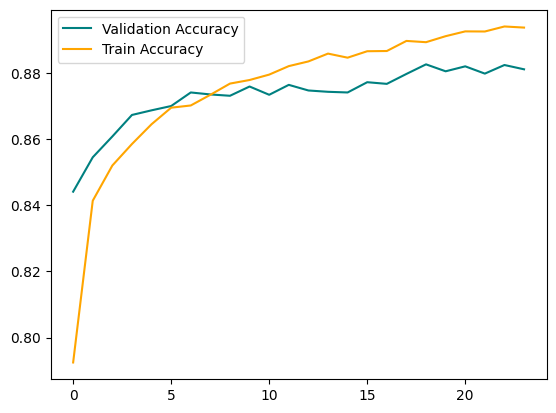

In [15]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')  
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy') 
plt.legend(loc="upper left")
plt.show() 

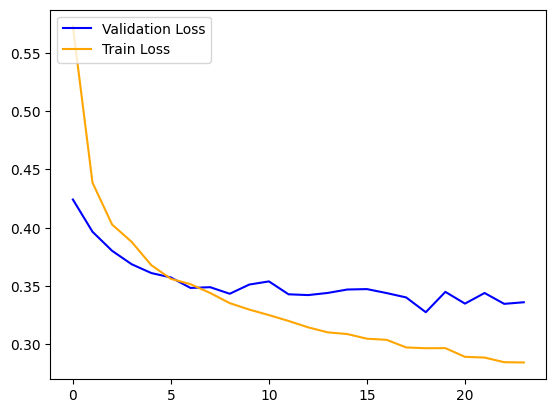

In [16]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.plot(history.history['loss'], color = 'orange', label = 'Train Loss')
plt.legend(loc="upper left")
plt.show() 

In [17]:
test_loss, test_acc_tf = model_tf.evaluate(test_images, test_labels, verbose=2) 
                                                                                
print('\nTest accuracy:', test_acc_tf) 

313/313 - 1s - 2ms/step - accuracy: 0.8826 - loss: 0.3275

Test accuracy: 0.8826000094413757


In [18]:
probability_model = tf.keras.Sequential([model_tf, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions_tf = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
predictions_tf[0]

array([2.0683486e-07, 2.3441070e-08, 1.1679006e-07, 1.4710794e-08,
       1.5451231e-07, 3.2621378e-03, 3.0379772e-07, 9.7031649e-03,
       3.5984647e-07, 9.8703361e-01], dtype=float32)

In [21]:
np.argmax(predictions_tf[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):  
                                                        
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label): 
                                                       
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

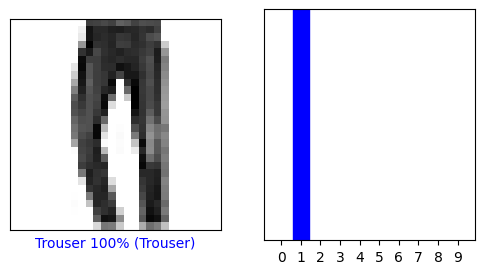

In [24]:
i = 5 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_tf[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_tf[i], test_labels)
plt.show()

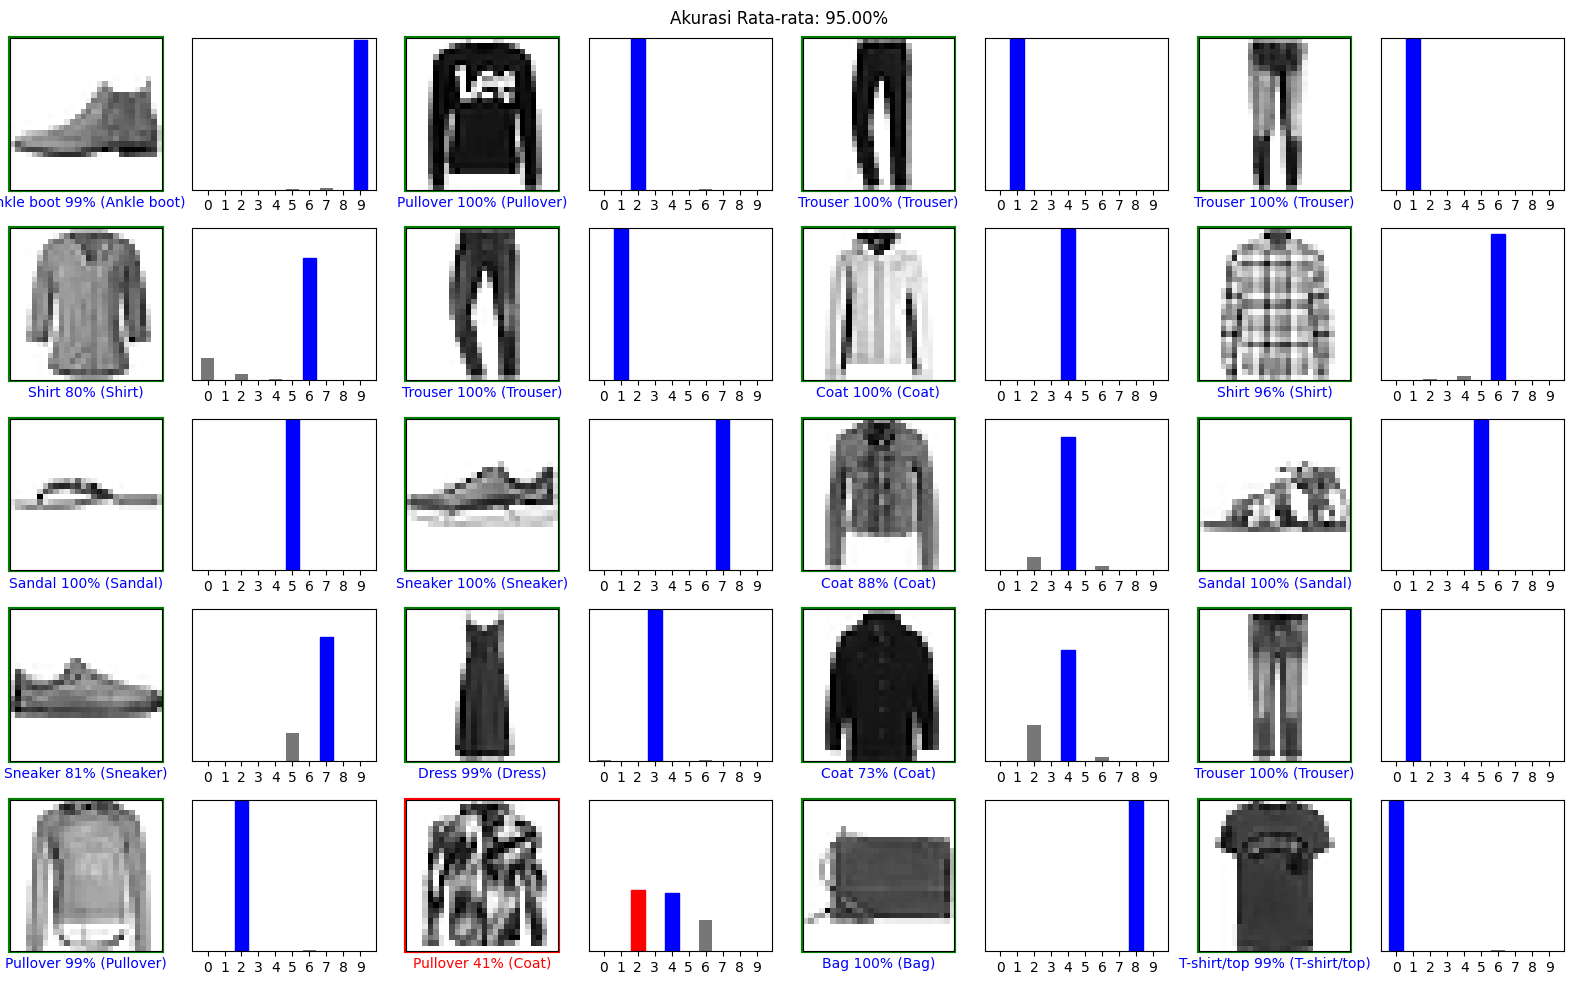

In [25]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_tf[i]) == test_labels[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100  

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_tf[i], test_labels, test_images)
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_tf[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

In [26]:
img = test_images[1] 

print(img.shape)

(28, 28, 1)


In [27]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28, 1)


In [28]:
predictions_single = probability_model.predict(img) 

print(predictions_single) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[1.9931425e-04 2.4238521e-13 9.9681997e-01 2.2356735e-08 4.6172753e-04
  4.1765580e-19 2.5190182e-03 5.6723979e-21 1.5659167e-11 3.7146804e-18]]


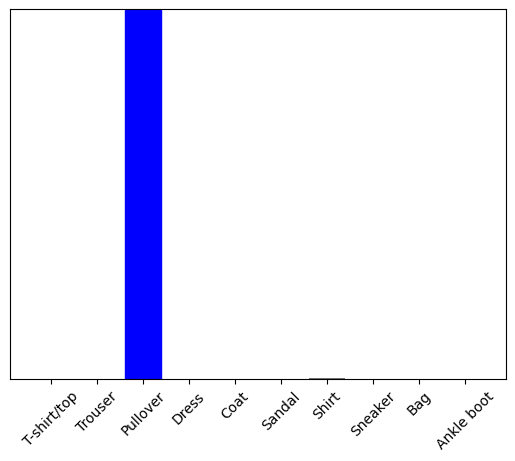

In [29]:
plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45) 
plt.show()

In [30]:
np.argmax(predictions_single[0]) 

2

In [31]:
df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_tf, axis=1),  
    'Proba_0': predictions_tf[:, 0],  
    'Proba_1': predictions_tf[:, 1]  
})

pixels = test_images.reshape(len(test_images), -1)

df_pixels = pd.DataFrame(pixels, columns=[f'pixel{i+1}' for i in range(28*28)])

df_test = pd.concat([df_test, df_pixels], axis=1)

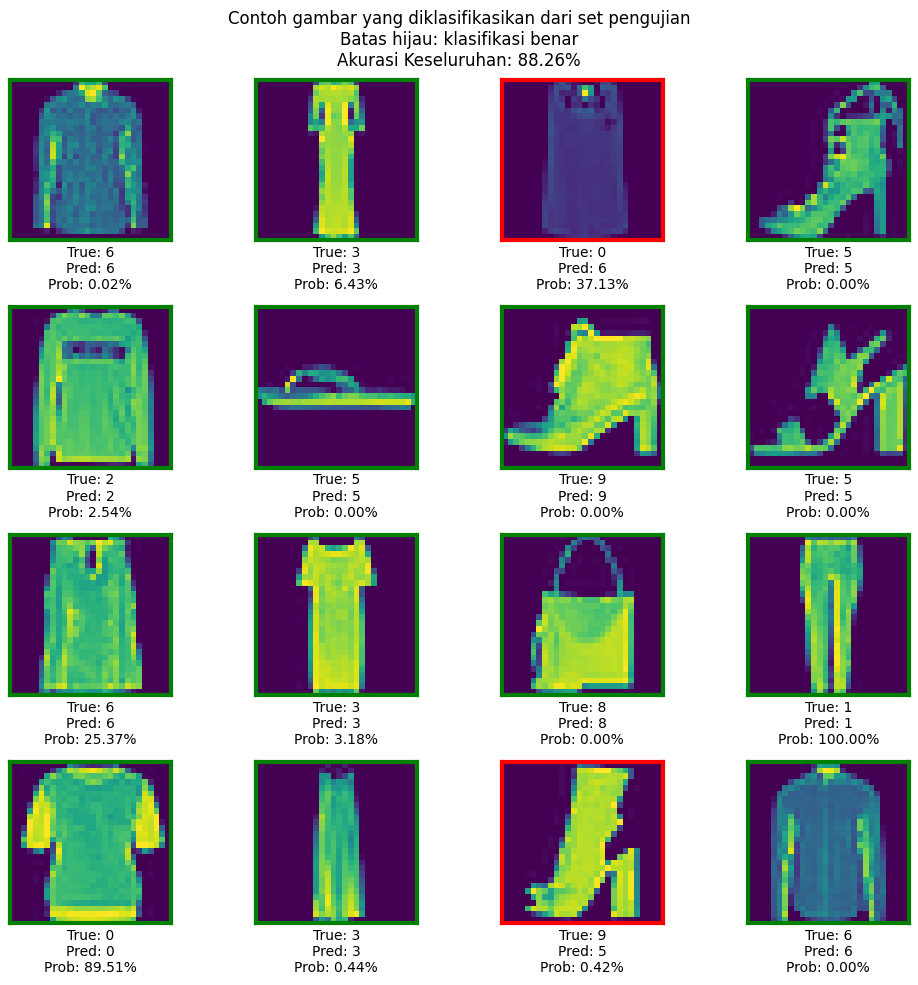

In [32]:
df_plot = df_test.sample(16, random_state=42).copy()
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]

    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100

    true_class = df_plot['Target'].values[i]

    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')

    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")

    edge_color = 'green' if predicted_class == true_class else 'red'
    axi.spines[:].set_edgecolor(edge_color)
    axi.spines[:].set_linewidth(3)

fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [4]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml('Fashion-mnist', version=1)

train_images = fashion_mnist.data[:60000]
train_labels = fashion_mnist.target[:60000].astype(int)
test_images = fashion_mnist.data[60000:]
test_labels = fashion_mnist.target[60000:].astype(int)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import train_test_split
import numpy as np

train_images_split, val_images, train_labels_split, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=41
)

model_sklearn = MLPClassifier(hidden_layer_sizes=(128,300),
                      activation='relu',
                      alpha=0.0001,
                      learning_rate_init=0.001,
                      early_stopping=True,
                      validation_fraction=0.2,
                      n_iter_no_change=10,
                      random_state=41,
                      verbose=True)

model_sklearn.fit(train_images_split, train_labels_split)
training_loss = model_sklearn.loss_curve_

Iteration 1, loss = 0.61410405
Validation score: 0.830833
Iteration 2, loss = 0.42383704
Validation score: 0.844792
Iteration 3, loss = 0.37433942
Validation score: 0.859167
Iteration 4, loss = 0.34642257
Validation score: 0.868750
Iteration 5, loss = 0.32798118
Validation score: 0.866146
Iteration 6, loss = 0.30781993
Validation score: 0.876042
Iteration 7, loss = 0.29345523
Validation score: 0.876042
Iteration 8, loss = 0.27704042
Validation score: 0.879062
Iteration 9, loss = 0.26540135
Validation score: 0.876667
Iteration 10, loss = 0.25628607
Validation score: 0.883125
Iteration 11, loss = 0.24483587
Validation score: 0.881458
Iteration 12, loss = 0.23666209
Validation score: 0.879271
Iteration 13, loss = 0.22635454
Validation score: 0.881458
Iteration 14, loss = 0.22106934
Validation score: 0.882604
Iteration 15, loss = 0.21187667
Validation score: 0.885000
Iteration 16, loss = 0.20308875
Validation score: 0.887292
Iteration 17, loss = 0.19996429
Validation score: 0.873854
Iterat

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model_sklearn, train_images, train_labels, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='neg_log_loss', random_state=41,  n_jobs=-1)

train_loss_mean = -train_scores.mean(axis=1)
val_loss_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_loss_mean, label='Training Loss')
plt.plot(train_sizes, val_loss_mean, label='Validation Loss')
plt.xlabel('Training set size')
plt.ylabel('Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.show()